## Locally Weighted Regression

Locally weighted linear regression is a supervised learning algorithm.

It a non-parametric algorithm.

There exists No training phase. All the work is done during the testing phase/while making predictions.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.txt')
df.head(3)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620


In [3]:
data = df.values
X = data[:,:1]
m = X.shape[0]
X = np.concatenate((X,np.ones((m,1))),axis=1)
y = data[:,1]
y = np.reshape(y,(m,1))
print(X.shape)
print(y.shape)

(97, 2)
(97, 1)


In [4]:
def weighting(X,x,tou):
    """
    This function takes in X(The entire training set), x(A particular value),
    a parameter to regulate the thickness of weighting and returns the weight 
    matrix which is then used.
    """
    X_1 = X[:,0]
    w = np.exp((-np.square(X_1 - x)) / tou**2 )
    return w

In [5]:
def costfun(X,y,theta,tou,x):
    """
    This function takes in X,y,theta and tou to calculate the cost i.e. a measure
    of how good our model is working based on theta values calculated.
    """
    m = y.shape[0]
    w = weighting(X,x,tou)
    temp = y - np.dot(X,theta)
    cost = np.sum(np.dot(w.T,np.square(temp)))
    return cost

In [6]:
def rateofchange(X,y,theta):
    """
    This function calculates the rate of change of theta which in turn is applied to theta
    making it converge to the best possible set of parameters giving the most accurate model.
    """
    m = y.shape[0]
    pred_dif = np.dot(X,theta)- y
    rate = (2 / m) * np.dot(X.T,pred_dif)
    return rate

In [7]:
def predict(X,y,x,tou,alpha,iterations):
    """
    Locally Weighted Regression is a supervised non parametric algorithm. And in such, it 
    is one that trains and predicts all at once. Hence this is such a function, which takes 
    in all parameters, trains (suitable to that particular 'x' only) and then finally returns 
    that prediction
    """
    theta = np.zeros((X.shape[1],1))
    m = y.shape[0]
    for i in range(iterations+1):
        pred = np.dot(X,theta)
        diff = pred - y
        theta = theta - (((alpha / m) * rateofchange(X,y,theta)))
        if i % iterations == 0:
            cost = costfun(X,y,theta,tou,x)
            print(cost," is the cost for iter number", i)
    return np.dot(np.array([x,1]),theta)

Text(0, 0.5, 'Profit')

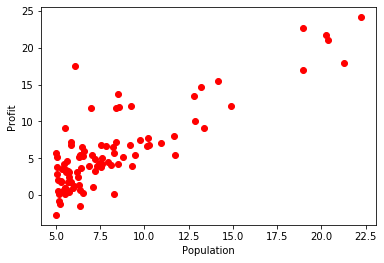

In [8]:
%matplotlib inline
plt.plot(X[:,0],y,'ro')
plt.xlabel('Population')
plt.ylabel('Profit')

In [9]:

res = predict(X,y,x = 10.5,tou = 0.05,alpha = 0.1,iterations = 1500)
print()
print('The Prediction for given x is:')
print(res)

3.8489169122697665e-08  is the cost for iter number 0
3.1611263518273097e-09  is the cost for iter number 1500

The Prediction for given x is:
[8.50628968]
